<a href="https://colab.research.google.com/github/matsveil/job-market-analyzer/blob/main/final-combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Final Project

# Economic Visualizations & More

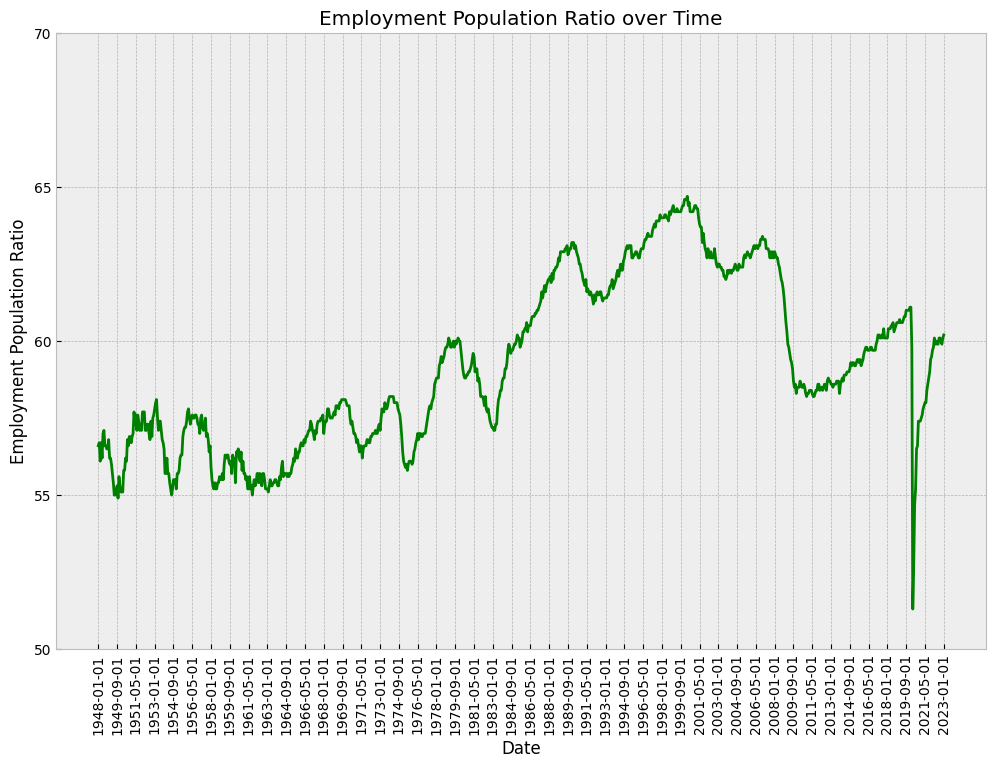

In [ ]:
from pandas.core.window.rolling import WindowingRankType
from IPython.core.history import HistoryAccessorBase
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=EMRATIO&scale=left&cosd=1948-01-01&coed=2023-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-02-03&revision_date=2023-02-03&nd=1948-01-01')

plt.plot(df['DATE'], df['EMRATIO'], color='green')
plt.xticks(df['DATE'][::20], rotation=90)
plt.yticks([50, 55, 60, 65, 70])
plt.xlabel('Date')
plt.ylabel('Employment Population Ratio')
plt.title('Employment Population Ratio over Time')
plt.show()

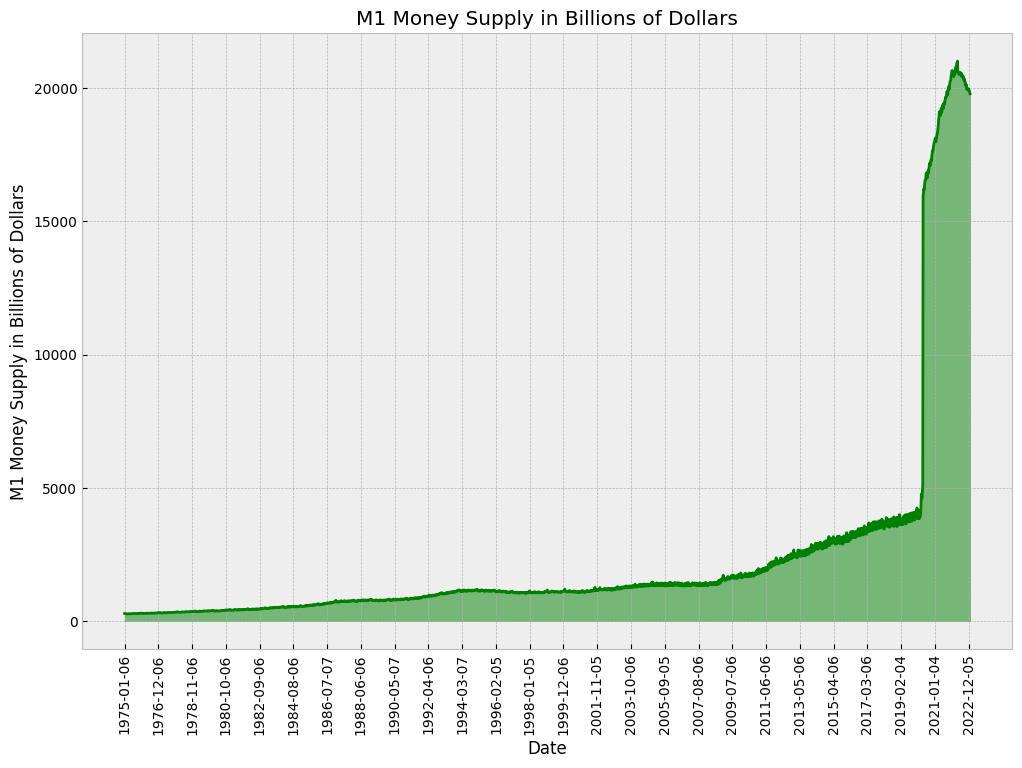

In [ ]:
df = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=WM1NS&scale=left&cosd=1975-01-06&coed=2023-01-02&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20Ending%20Monday&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-01-25&revision_date=2023-01-25&nd=1975-01-06")

# Plot the data with an appropriate title
plt.title('M1 Money Supply in Billions of Dollars')
plt.plot(df['DATE'], df['WM1NS'], color='green')
plt.xticks(df['DATE'][::100], rotation=90)
plt.fill_between(df['DATE'], df['WM1NS'], alpha=.5, color='green')
plt.xlabel('Date')
plt.ylabel('M1 Money Supply in Billions of Dollars')
plt.show()

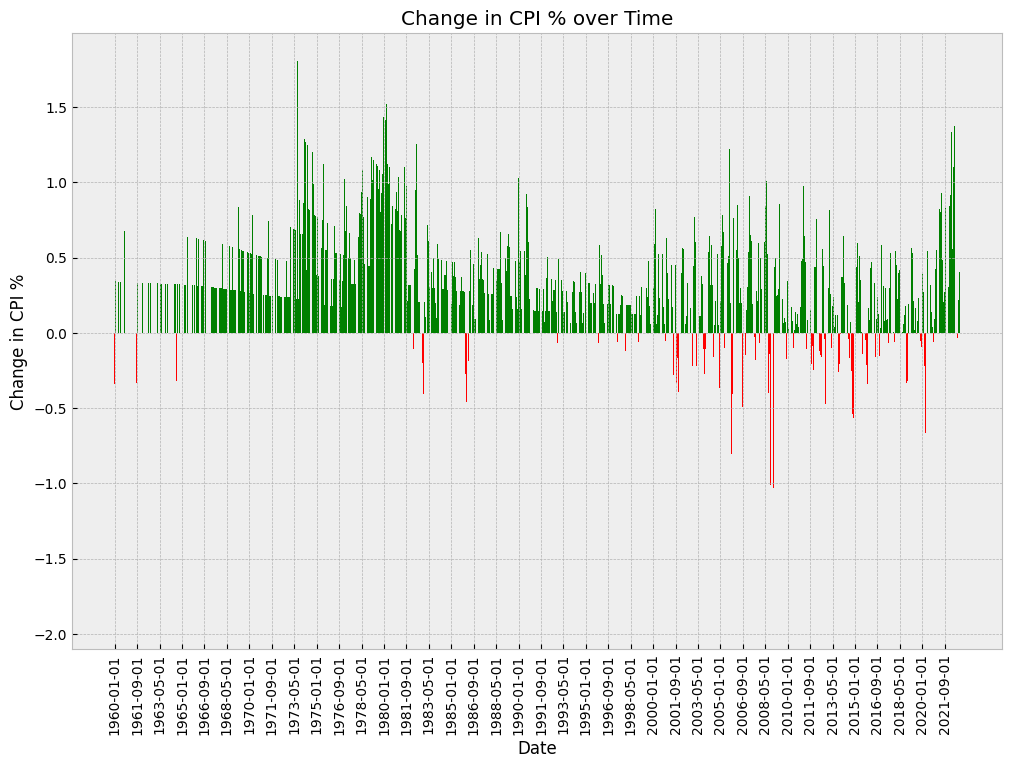

In [ ]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPALTT01USM657N&scale=left&cosd=1960-01-01&coed=2022-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-01-11&revision_date=2023-01-11&nd=1960-01-01'

data = pd.read_csv(url)

# Set colors for positive and negative values
data['color'] = ['green' if x > 0 else 'red' for x in data['CPALTT01USM657N']]

# Plot the data with colors
plt.bar(data['DATE'], data['CPALTT01USM657N'], color=data['color'])
plt.xticks(data['DATE'][::20], rotation=90)
plt.xlabel('Date')
plt.ylabel('Change in CPI %')
plt.title('Change in CPI % over Time')
plt.show()

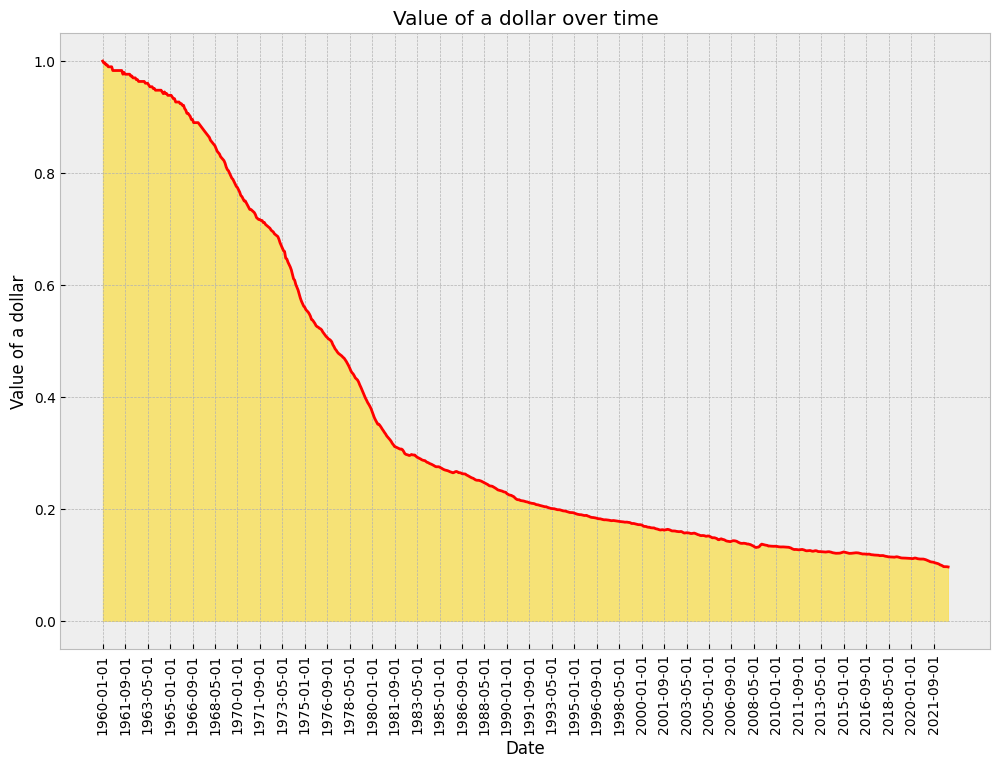

In [ ]:
# Calculate the value of a dollar over time
base_value = 1    # Set the base value of the dollar
data['Dollar_Value'] = base_value

for i in range(1, len(data)):
  data.loc[i, 'Dollar_Value'] = (1 - (data.loc[i, 'CPALTT01USM657N'] / 100)) * data.loc[i-1, 'Dollar_Value']

# Plot the performance of the dollar over the years
plt.plot(data['DATE'], data['Dollar_Value'], color='r')
plt.xticks(data['DATE'][::20], rotation=90)
plt.xlabel('Date')
plt.ylabel('Value of a dollar')
plt.title('Value of a dollar over time')
plt.fill_between(data['DATE'], data['Dollar_Value'], alpha=.5, color='gold')
plt.show()

Time Series Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load the data
cpi_data = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CORESTICKM159SFRBATL&scale=left&cosd=1967-12-01&coed=2023-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-04-10&revision_date=2023-04-10&nd=1967-12-01')
unemployment_data = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATENSA&scale=left&cosd=1948-01-01&coed=2023-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-04-10&revision_date=2023-04-10&nd=1948-01-01')

In [ ]:
# Define functions for data preprocessing and model fitting
def preprocess_data(cpi_data, unemployment_data):
    """
    Preprocesses the job openings and unemployment data by converting the DATE column to datetime,
    dropping any rows with missing values, and converting the relevant columns to numeric.
    """
    cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])
    cpi_data = cpi_data.dropna()
    cpi_data['CORESTICKM159SFRBATL'] = pd.to_numeric(cpi_data['CORESTICKM159SFRBATL'])

    unemployment_data['DATE'] = pd.to_datetime(unemployment_data['DATE'])
    unemployment_data = unemployment_data.dropna()
    unemployment_data['UNRATENSA'] = pd.to_numeric(unemployment_data['UNRATENSA'])

    # Merge the data on DATE
    merged_data = pd.merge(cpi_data, unemployment_data, on='DATE')
    merged_data.set_index('DATE', inplace=True)

    return merged_data

def fit_arima_model(data):
    """
    Fits a SARIMAX model to the preprocessed data and returns the model fit object.
    """
    arima_model = ARIMA(data['UNRATENSA'], exog=data['CORESTICKM159SFRBATL'], order=(1,1,1), seasonal_order=(1,1,1,12))
    arima_model_fit = arima_model.fit()
    return arima_model_fit

In [ ]:
# Preprocess the data
try:
    data = preprocess_data(cpi_data, unemployment_data)
except Exception as e:
    print(f"Error occurred while preprocessing data: {e}")

# Fit a SARIMAX model to the preprocessed data
try:
    arima_model_fit = fit_arima_model(data)
except Exception as e:
    print(f"Error occurred while fitting SARIMAX model: {e}")

# Forecast future unemployment rates
forecast_steps = 24
try:
    forecast_results = arima_model_fit.get_forecast(steps=forecast_steps, exog=cpi_data['CORESTICKM159SFRBATL'][-forecast_steps:], alpha=0.05)
    unemployment_forecast = forecast_results.predicted_mean
    ci_lower = forecast_results.conf_int()['lower UNRATENSA']
    ci_upper = forecast_results.conf_int()['upper UNRATENSA']
except Exception as e:
    print(f"Error occurred while forecasting unemployment rates: {e}")

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Define threshold unemployment rate
threshold = 4

# Determine the best time to switch jobs
if unemployment_forecast.iloc[-1] > threshold:
    switch_jobs = True
    switch_reason = "The forecasted unemployment rate ({:.2f}) is above the threshold ({:.2f}).".format(unemployment_forecast.iloc[-1], threshold)
else:
    switch_jobs = False
    switch_reason = "The forecasted unemployment rate ({:.2f}) is below the threshold ({:.2f}).".format(unemployment_forecast.iloc[-1], threshold)

print(switch_reason)

The forecasted unemployment rate (3.57) is below the threshold (4.00).


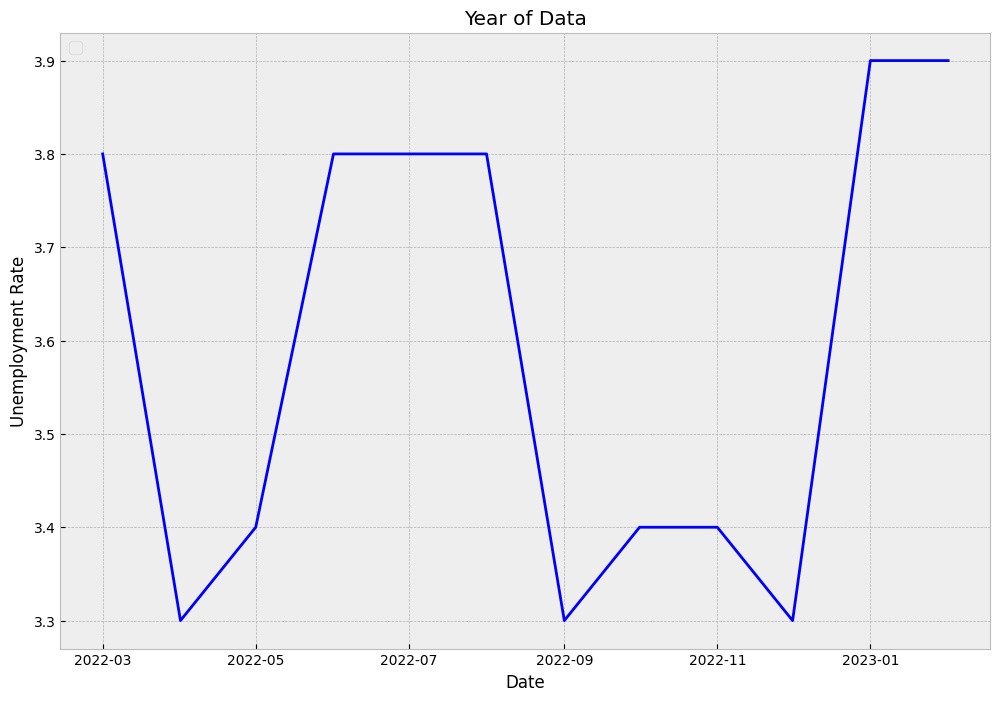

In [ ]:
start_date = '2022-03-01'
end_date = '2023-03-01'

plt.plot(data[start_date:end_date].index, data[start_date:end_date]['UNRATENSA'], color='blue', linestyle='-', label='')

plt.title('Year of Data')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left', fontsize='large')
plt.show()

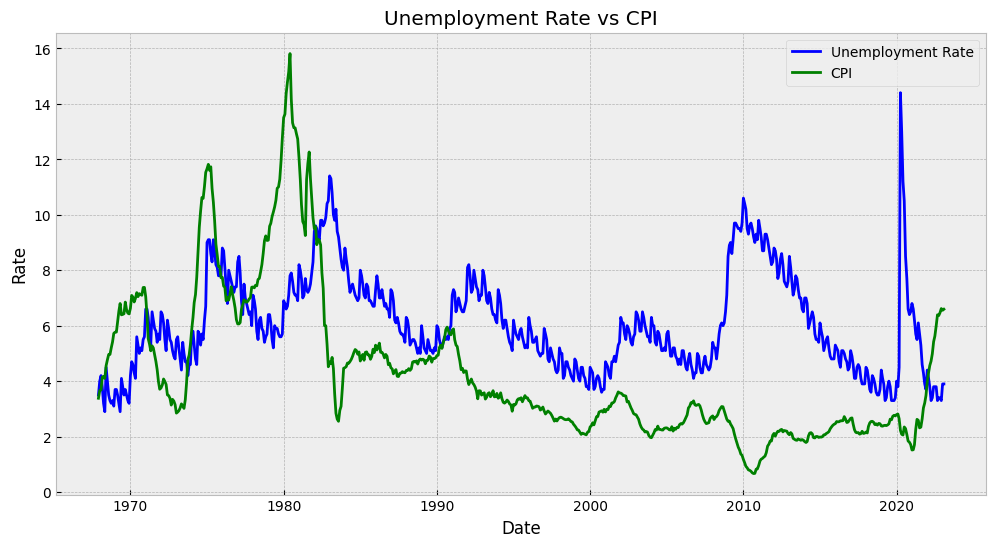

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['UNRATENSA'], color='blue', linestyle='-', label='Unemployment Rate')
plt.plot(data['CORESTICKM159SFRBATL'], color='green', linestyle='-', label='CPI')
plt.title('Unemployment Rate vs CPI')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

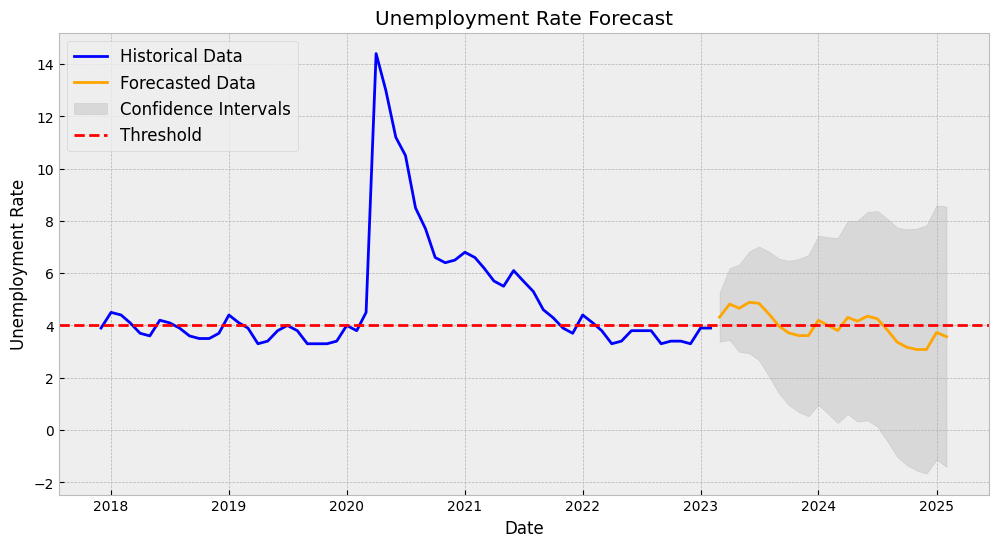

In [ ]:
# Extend the date range for the forecasted data
forecast_dates = pd.date_range(start=unemployment_data['DATE'].iloc[-2], periods=forecast_steps+1, freq='MS')[1:]

plt.figure(figsize=(12,6))
plt.plot(data.index[600:], data['UNRATENSA'][600:], color='blue', linestyle='-', label='Historical Data')
plt.plot(forecast_dates, unemployment_forecast, color='orange', linestyle='-', label='Forecasted Data')
plt.fill_between(ci_lower.index, ci_lower, ci_upper, alpha=0.2, color='gray', label='Confidence Intervals')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.grid(True)
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left', fontsize='large')
plt.show()

In [ ]:
# install yfinance for Yahoo Finance access
!pip install yfinance

import yfinance as yf
import tensorflow as tf

import numpy as np
from IPython.display import Markdown as md

ticker = input('Enter a stock ticker: ')
# Download last year of data for user inputted ticker
data = yf.download(ticker, period='1y')
# Normalize data
matrix = tf.keras.utils.normalize(data.values)
# Create model
model = tf.keras.models.Sequential()
# Add 128 Neuron Layer
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(matrix.shape[1],)))
# Add 64 Neuron Layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
# Add 1 Neuron Layer
model.add(tf.keras.layers.Dense(1))
# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(matrix, data['Close'], epochs=100)

predicted_prices = model.predict(matrix)
predicted_prices = np.array(predicted_prices).flatten()

mean_predicted_price = np.mean(predicted_prices)

current_price = data['Close'][-1]
change = (mean_predicted_price - current_price) / current_price
percent_change = change * 100

color = 'red'
increase_decrease = 'decrease'

if percent_change >= 0:
  increase_decrease = 'increase'
  color = 'green'

md('<h1>' + ticker + ' Predicted Prices 1 year in the future:</h1><br />' + str(predicted_prices) +
  '<br /><br /><h1>' + ticker + ' Average Predicted Price 1 Year in the Future:<br />&dollar;' + str(mean_predicted_price) +
  '<br /><br />' + ticker + ' Current Price:<br />&dollar;' + str(current_price) +
  '<br /><br />' + ticker + ' Percent Change from Current Price to Average Predicted Price 1 Year in the Future:<br /><font color="' + color + '">' +
  str(percent_change) + '% ' + increase_decrease + '</font></h1>')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enter a stock ticker: AAPL
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 22460.5879
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 22344.6523
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 22257.4238
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 22157.3438
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 22026.1270
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 21854.7227
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 21628.4727
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 21336.0020
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 20962.8340
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - l

<h1>AAPL Predicted Prices 1 year in the future:</h1><br />[149.53456 149.5345  149.53459 149.53453 149.53459 149.53462 149.53462
 149.53444 149.53444 149.53436 149.53435 149.53438 149.5342  149.5342
 149.53421 149.53438 149.53429 149.5342  149.53424 149.53416 149.53423
 149.53413 149.53404 149.53421 149.53436 149.53442 149.53421 149.53412
 149.5341  149.53418 149.53423 149.53429 149.53432 149.53433 149.53426
 149.53447 149.53448 149.53433 149.53447 149.5345  149.53471 149.53448
 149.53429 149.53413 149.53432 149.53429 149.53418 149.5341  149.53435
 149.53441 149.53442 149.53432 149.53447 149.53448 149.5345  149.53424
 149.53444 149.53442 149.53444 149.53453 149.53456 149.53456 149.53441
 149.53447 149.53442 149.53445 149.5344  149.53438 149.53459 149.53459
 149.53459 149.53477 149.53471 149.53445 149.53444 149.53432 149.53459
 149.5347  149.53445 149.53482 149.53477 149.53471 149.53468 149.53459
 149.5348  149.53465 149.5349  149.53484 149.53453 149.53474 149.53462
 149.53462 149.53487 149.53487 149.53493 149.5345  149.53453 149.53447
 149.53438 149.5345  149.53447 149.5345  149.53438 149.53438 149.53456
 149.53429 149.53421 149.53438 149.53436 149.53407 149.53442 149.53426
 149.53429 149.53438 149.53432 149.53433 149.53438 149.53412 149.53416
 149.53416 149.5342  149.53435 149.5344  149.5345  149.53433 149.53442
 149.53441 149.53445 149.5342  149.53432 149.53435 149.53426 149.53459
 149.53455 149.53436 149.53444 149.53447 149.53436 149.53423 149.53407
 149.53432 149.53442 149.53432 149.53426 149.5341  149.53435 149.5343
 149.53438 149.5342  149.53432 149.53447 149.53436 149.53458 149.53442
 149.53447 149.53465 149.53477 149.53467 149.53525 149.5345  149.53436
 149.53421 149.53448 149.53456 149.5345  149.53455 149.53447 149.53456
 149.53442 149.53447 149.53432 149.53438 149.53426 149.53404 149.53435
 149.53436 149.53432 149.53436 149.53447 149.53442 149.53429 149.53436
 149.53436 149.53416 149.53426 149.53432 149.53427 149.53441 149.53447
 149.53442 149.53441 149.53458 149.5345  149.53444 149.53458 149.53436
 149.53436 149.5345  149.5345  149.53468 149.53447 149.53456 149.53453
 149.53442 149.53421 149.5341  149.53453 149.5344  149.53459 149.53471
 149.53468 149.53462 149.53462 149.53459 149.53456 149.53467 149.53465
 149.53479 149.53487 149.53468 149.53493 149.5348  149.53468 149.53474
 149.5345  149.53438 149.53471 149.5349  149.53474 149.53453 149.53438
 149.53447 149.53445 149.53447 149.53432 149.5345  149.5345  149.5345
 149.53459 149.53471 149.53484 149.53499 149.53487 149.53493 149.53459
 149.53477 149.53502 149.53487 149.53505 149.53499]<br /><br /><h1>AAPL Average Predicted Price 1 Year in the Future:<br />&dollar;149.53447<br /><br />AAPL Current Price:<br />&dollar;162.02999877929688<br /><br />AAPL Percent Change from Current Price to Average Predicted Price 1 Year in the Future:<br /><font color="red">-7.711861549678221% decrease</font></h1>